<a href="https://colab.research.google.com/github/hamedebrahimi68/financial_markets_predictoin/blob/master/bitcoin_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime, timedelta

In [12]:
# Alpha Vantage API endpoint
url = 'https://www.alphavantage.co/query'

# Parameters for API request
params = {
    'function': 'DIGITAL_CURRENCY_DAILY',
    'symbol': 'BTC',
    'market': 'USD',
    'apikey': 'WU80VALJB0Q2HOO9'
}

# Make API request
response = requests.get(url, params=params)
data = response.json()


In [13]:
import mercury as mr

app = mr.App(title="Display notebook", static_notebook=True)

mr.JSON(data)

mercury.App

In [ ]:
# Extract time series data
time_series = data['Time Series (Digital Currency Daily)']
time_series

In [18]:

# Convert to DataFrame
df = pd.DataFrame.from_dict(time_series, orient='index')
df.reset_index(inplace=True)
df.columns = ['ds', '1. open (USD)', '2. high (USD)', '3. low (USD)',
              '4. close (USD)','5. volume']

# Convert columns to numeric and select close price
df['ds'] = pd.to_datetime(df['ds'])
df['y'] = pd.to_numeric(df['4. close (USD)'])

# Select and sort columns
df = df[['ds', 'y']].sort_values('ds')
df

,ds,y
349,2023-12-19,42266.22
348,2023-12-20,43674.77
347,2023-12-21,43875.32
346,2023-12-22,44013.73
345,2023-12-23,43726.35
...,...,...
4,2024-11-28,95665.53
3,2024-11-29,97490.56
2,2024-11-30,96465.42
1,2024-12-01,97263.18


DEBUG:cmdstanpy:input tempfile: /tmp/tmpry9z_3i7/j971xi1h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpry9z_3i7/n20zsz0v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10673', 'data', 'file=/tmp/tmpry9z_3i7/j971xi1h.json', 'init=/tmp/tmpry9z_3i7/n20zsz0v.json', 'output', 'file=/tmp/tmpry9z_3i7/prophet_model7yweuwnq/prophet_model-20241202182157.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:21:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:21:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


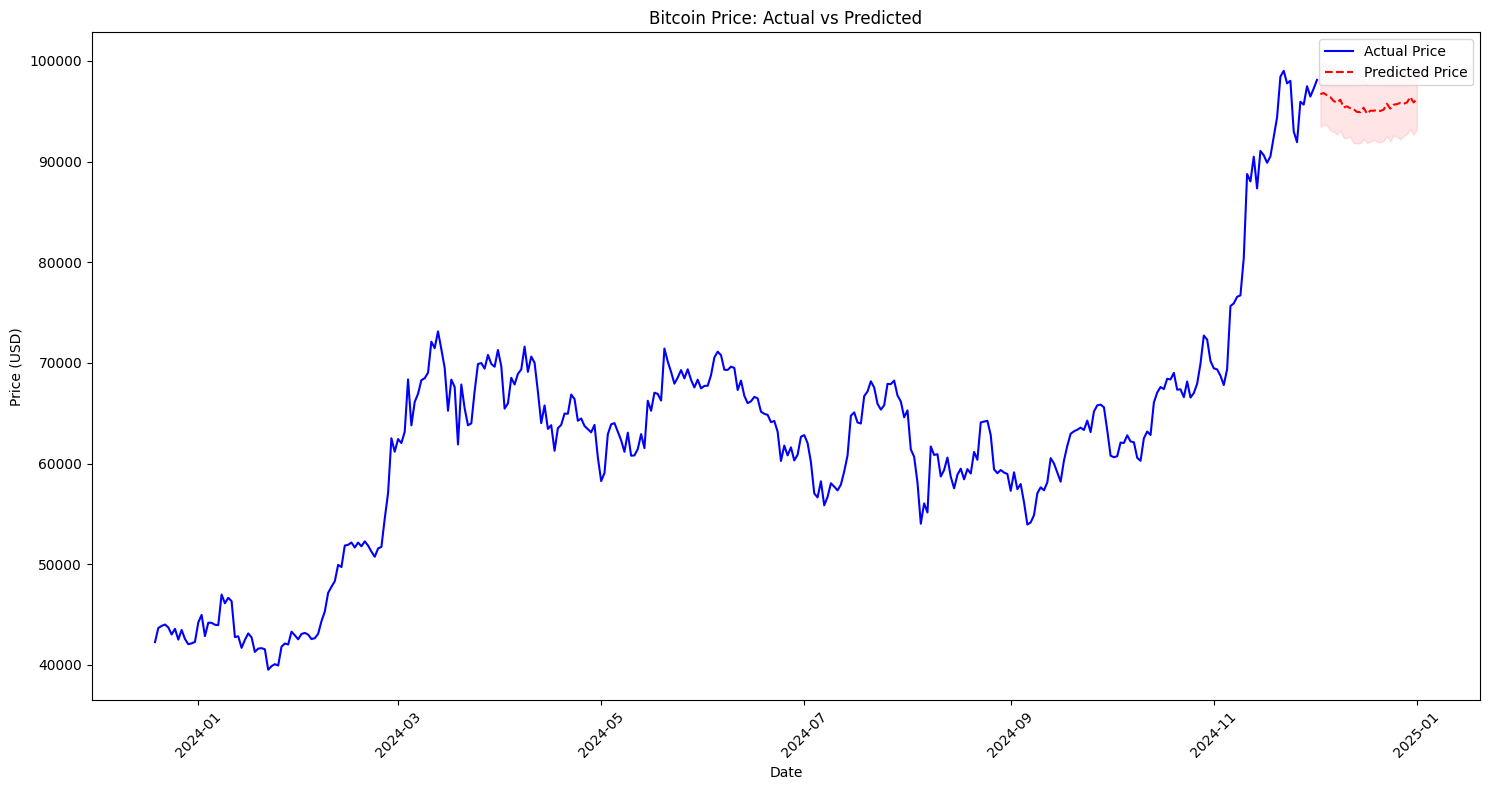

In [19]:
def predict_bitcoin_prices(df):
    # Create and fit Prophet model
    model = Prophet(daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
    model.fit(df)

    # Create future dataframe for last 30 days
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    return forecast, model

def plot_bitcoin_prediction(df, forecast):
    plt.figure(figsize=(15,8))

    # Plot actual prices
    plt.plot(df['ds'], df['y'], label='Actual Price', color='blue')

    # Plot predicted prices
    predicted_dates = pd.to_datetime(forecast['ds'])
    plt.plot(predicted_dates[-30:], forecast['yhat'][-30:], label='Predicted Price', color='red', linestyle='--')

    # Add prediction interval
    plt.fill_between(
        predicted_dates[-30:],
        forecast['yhat_lower'][-30:],
        forecast['yhat_upper'][-30:],
        color='red',
        alpha=0.1
    )

    plt.title('Bitcoin Price: Actual vs Predicted')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def main():

    # Predict prices
    forecast, model = predict_bitcoin_prices(df)

    # Plot results
    plot_bitcoin_prediction(df, forecast)

if __name__ == '__main__':
    main()